In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_csv("monthly_milk_production.csv", index_col="Date", parse_dates=True)

In [5]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [6]:
df.tail()

,Production
Date,
1975-08-01,858
1975-09-01,817
1975-10-01,827
1975-11-01,797
1975-12-01,843


In [9]:
df["1962":"1963"]

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
1962-06-01,697
1962-07-01,640
1962-08-01,599
1962-09-01,568


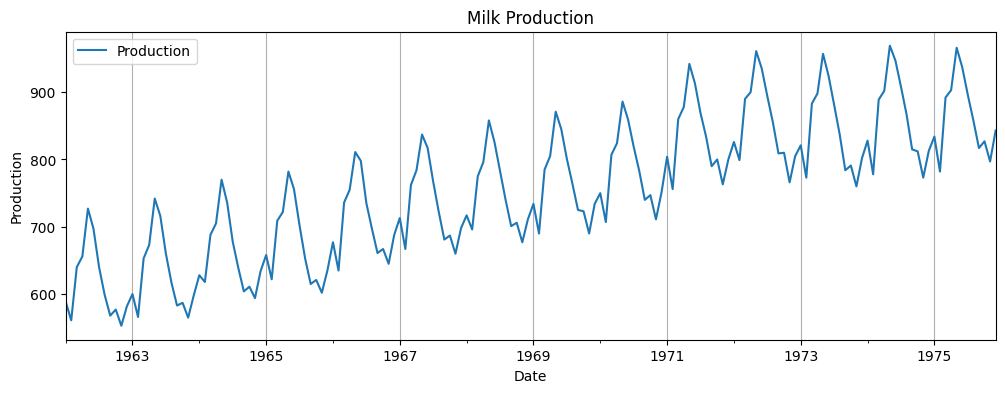

In [22]:
df.plot(figsize=(12, 4), xlabel="Date", ylabel="Production", title="Milk Production")
plt.grid(axis="x")
plt.show()

In [23]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [25]:
result = seasonal_decompose(df["Production"])

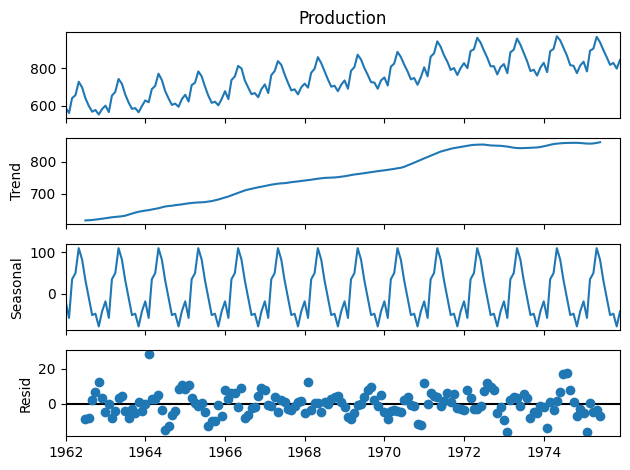

In [28]:
result.plot();

In [29]:
len(df)

168

In [30]:
len(df)/12

14.0

In [31]:
train = df.iloc[:len(df)-12]
train.shape

(156, 1)

In [32]:
test = df.iloc[len(df)-12:]
test.shape

(12, 1)

In [35]:
train.iloc[0], train.iloc[-1]

(Production    589
 Name: 1962-01-01 00:00:00, dtype: int64,
 Production    813
 Name: 1974-12-01 00:00:00, dtype: int64)

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()

In [38]:
scaler.fit(train)

MinMaxScaler()

In [39]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [40]:
scaled_train[:10]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231]])

In [42]:
scaled_train[146:]

array([[0.80769231],
       [0.83894231],
       [1.        ],
       [0.94711538],
       [0.85336538],
       [0.75480769],
       [0.62980769],
       [0.62259615],
       [0.52884615],
       [0.625     ]])

In [43]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [44]:
months = 12

In [45]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length=months, batch_size=1)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Production  168 non-null    int64
dtypes: int64(1)
memory usage: 6.7 KB


In [47]:
X, y = generator[0]

In [48]:
X, y

(array([[[0.08653846],
         [0.01923077],
         [0.20913462],
         [0.24759615],
         [0.41826923],
         [0.34615385],
         [0.20913462],
         [0.11057692],
         [0.03605769],
         [0.05769231],
         [0.        ],
         [0.06971154]]]),
 array([[0.11298077]]))

In [49]:
X1, y1 = generator[1]

In [50]:
X1, y1

(array([[[0.01923077],
         [0.20913462],
         [0.24759615],
         [0.41826923],
         [0.34615385],
         [0.20913462],
         [0.11057692],
         [0.03605769],
         [0.05769231],
         [0.        ],
         [0.06971154],
         [0.11298077]]]),
 array([[0.03125]]))

In [51]:
X2, y2 = generator[2]

In [52]:
X2, y2

(array([[[0.20913462],
         [0.24759615],
         [0.41826923],
         [0.34615385],
         [0.20913462],
         [0.11057692],
         [0.03605769],
         [0.05769231],
         [0.        ],
         [0.06971154],
         [0.11298077],
         [0.03125   ]]]),
 array([[0.24038462]]))

In [53]:
generator[0][0].shape

(1, 12, 1)

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [56]:
model = Sequential([
    LSTM(1000, activation="relu", input_shape=(12, 1)),
    Dense(1)
])

In [58]:
model.compile(optimizer="adam", loss="mse")

In [59]:
model.fit(generator, epochs=40)

Epoch 1/40

144/144 [==============================] - 17s 107ms/step - loss: 0.0376
Epoch 2/40
144/144 [==============================] - 15s 107ms/step - loss: 0.0241
Epoch 3/40
144/144 [==============================] - 16s 110ms/step - loss: 0.0117
Epoch 4/40
144/144 [==============================] - 15s 106ms/step - loss: 0.0047
Epoch 5/40
144/144 [==============================] - 15s 106ms/step - loss: 0.0035
Epoch 6/40
144/144 [==============================] - 15s 106ms/step - loss: 0.0030
Epoch 7/40
144/144 [==============================] - 15s 106ms/step - loss: 0.0035
Epoch 8/40
144/144 [==============================] - 15s 106ms/step - loss: 0.0033
Epoch 9/40
144/144 [==============================] - 15s 106ms/step - loss: 0.0032
Epoch 10/40
144/144 [==============================] - 16s 110ms/step - loss: 0.0022
Epoch 11/40
144/144 [==============================] - 15s 107ms/step - loss: 0.0029
Epoch 12/40
144/144 [==============================] - 15s 106ms/step - l

In [60]:
loss = model.history.history["loss"]

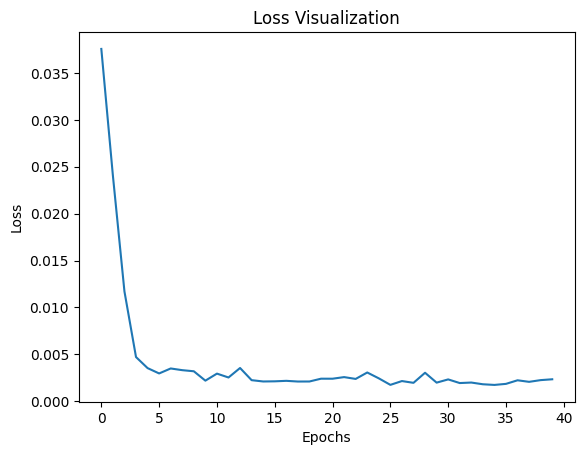

In [63]:
plt.plot(loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Visualization")
plt.show()

In [64]:
test_pred = []

first_eval_batch = scaled_train[-12:]
current_batch = first_eval_batch.reshape((1, 12, 1))

In [70]:
for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_pred.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

1/1 [==============================] - 0s 38ms/step


In [71]:
test_pred

[array([0.69028085], dtype=float32),
 array([0.5968646], dtype=float32),
 array([0.826599], dtype=float32),
 array([0.88241], dtype=float32),
 array([1.0190139], dtype=float32),
 array([0.9894201], dtype=float32),
 array([0.8982891], dtype=float32),
 array([0.8008311], dtype=float32),
 array([0.6793729], dtype=float32),
 array([0.6549086], dtype=float32),
 array([0.571575], dtype=float32),
 array([0.6478042], dtype=float32)]

In [73]:
test.head()

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966


In [74]:
true_pred = scaler.inverse_transform(test_pred)

In [75]:
true_pred

array([[840.15683556],
       [801.29566574],
       [896.86518478],
       [920.08255577],
       [976.90977478],
       [964.59876823],
       [926.68825912],
       [886.14572906],
       [835.61912918],
       [825.44197655],
       [790.77519417],
       [822.48654747]])

In [77]:
test["Predictions"]=true_pred

C:\Users\Soft\AppData\Local\Temp\ipykernel_22028\1554448157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Predictions"]=true_pred


In [78]:
test.head()

,Production,Predictions
Date,,
1975-01-01,834,840.156836
1975-02-01,782,801.295666
1975-03-01,892,896.865185
1975-04-01,903,920.082556
1975-05-01,966,976.909775


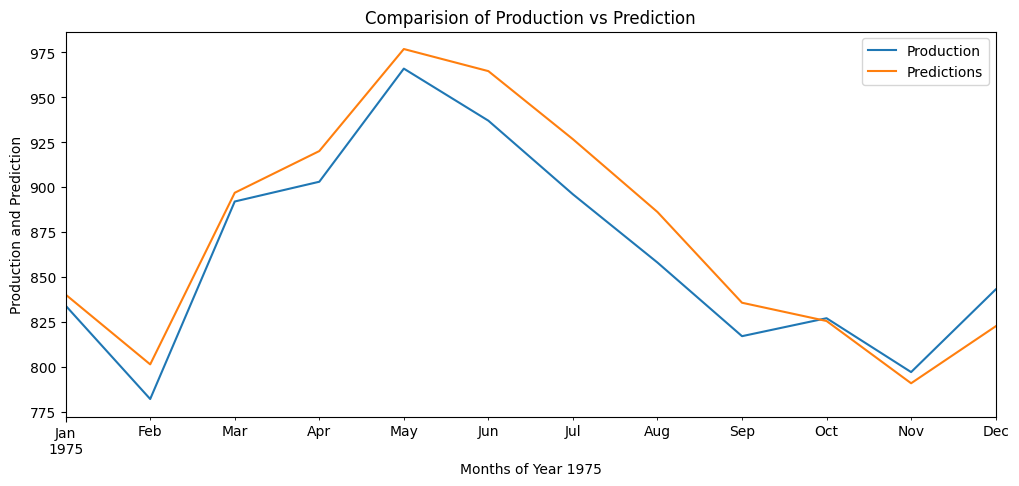

In [80]:
test.plot(figsize=(12, 5))
plt.xlabel("Months of Year 1975")
plt.ylabel("Production and Prediction")
plt.title("Comparision of Production vs Prediction")
plt.show()

In [81]:
from sklearn.metrics import mean_squared_error

In [83]:
rmse = np.sqrt(mean_squared_error(test["Production"], test["Predictions"]))

In [84]:
rmse

18.59441881426606

In [85]:
test["Production"].mean()

862.6666666666666

In [86]:
test["Predictions"].mean()

873.9221350351969

In [89]:
min = 862.66 - rmse
max = 862.66 + rmse

In [90]:
min, max

(844.0655811857339, 881.254418814266)